In [1]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xls = pd.ExcelFile('bank_term_deposit_marketing_analysis.xlsx')

In [3]:
xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [4]:
client_info = pd.read_excel(xls, 'CLIENT_INFO')
loan_history = pd.read_excel(xls, "LOAN_HISTORY")
marketing_history = pd.read_excel(xls, "MARKETING HISTORY")
subscription_history = pd.read_excel(xls, "SUBSCRIPTION HISTORY")

In [5]:
client_info.head(5)

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


### Creating DataFrame by joining above sheets

In [6]:
df = pd.merge(client_info, loan_history, on=["ID"])
df = pd.merge(df, marketing_history, on="ID")
df = pd.merge(df, subscription_history, on="ID")
df.head()

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df=df.drop(["ID"], axis=1)

## Downloading and Initializing H2O, and preparing data.

In [8]:
!pip install requests
!pip install tabulate

In [9]:
import h2o
from h2o.automl import H2OAutoML

In [10]:
# initializing h20

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,16 mins 46 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,"7 days, 9 hours and 56 minutes"
H2O_cluster_name:,Harinath
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.908 Gb
H2O_cluster_total_cores:,20
H2O_cluster_allowed_cores:,20
H2O_cluster_status:,"locked, healthy"


In [11]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [12]:
h2o_df.describe()

Rows:45211
Cols:17

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432809,,,,,1362.272057685082,,,,15.806418791886935,,258.1630797814693,2.7638406582468984,40.1978279622216,0.5803233726305563,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.61876204097539,,,,,3044.7658291685234,,,,8.32247615304459,,257.5278122651711,3.0980208832791796,100.1287459905981,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [13]:
## creating train and test data from our dataframe

train, test = h2o_df.split_frame(ratios=[.75])


x = train.columns #Predictors
y = 'TERM_DEPOSIT' #response

#remove response variable from x

x.remove(y)


In [14]:
# Let's explore our response variable and see if it has balanced data

df.TERM_DEPOSIT.value_counts()

no     39922
yes     5289
Name: TERM_DEPOSIT, dtype: int64

## Running H2OAutoML

In [15]:
aml = H2OAutoML(max_runtime_secs=600, 
                balance_classes=True, 
                stopping_metric="logloss",
                project_name="Final",
                seed=1)

%time aml.train(x=x, y=y, training_frame=train)

AutoML progress: |
20:45:19.803: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
Wall time: 10min 2s


key,value
Stacking strategy,cross_validation
Number of base models (used / total),15/37
# GBM base models (used / total),11/29
# DRF base models (used / total),1/2
# DeepLearning base models (used / total),3/5
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [16]:
# Let's take a look at leaderboard

lb= aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_3_AutoML_1_20231023_204519,0.936945,0.192431,0.634855,0.167016,0.246443,0.0607343
StackedEnsemble_AllModels_4_AutoML_1_20231023_204519,0.93692,0.192478,0.634346,0.164301,0.246497,0.0607606
StackedEnsemble_AllModels_2_AutoML_1_20231023_204519,0.936312,0.193244,0.630125,0.181828,0.247005,0.0610117
StackedEnsemble_AllModels_1_AutoML_1_20231023_204519,0.936017,0.193643,0.629669,0.176065,0.247102,0.0610592
StackedEnsemble_BestOfFamily_4_AutoML_1_20231023_204519,0.935843,0.193951,0.628502,0.180839,0.247241,0.0611279
StackedEnsemble_BestOfFamily_3_AutoML_1_20231023_204519,0.935466,0.194448,0.625639,0.168271,0.24773,0.0613701
StackedEnsemble_BestOfFamily_2_AutoML_1_20231023_204519,0.935134,0.194957,0.624554,0.170272,0.247876,0.0614425
StackedEnsemble_BestOfFamily_5_AutoML_1_20231023_204519,0.935086,0.201496,0.625196,0.1702,0.248704,0.0618538
GBM_grid_1_AutoML_1_20231023_204519_model_2,0.9347,0.196745,0.624019,0.175396,0.249127,0.0620643
GBM_grid_1_AutoML_1_20231023_204519_model_6,0.934638,0.197809,0.628235,0.169205,0.249611,0.0623057


#### Meta-learners are commonly used in ensemble learning, which aims to improve the accuracy and robustness of machine learning models by combining the predictions of multiple base learners. By aggregating the outputs of these base models, ensemble methods can often achieve better results than any individual model.

In [19]:
# let's pick the best model from the above List of models.

stacked_ensemble = aml.leader # this will give us the best model from leaderboard

metalearner = h2o.get_model(stacked_ensemble.metalearner()['name'])

In [20]:
metalearner.varimp()

[('DRF_1_AutoML_1_20231023_204519',
  0.6339378356933594,
  1.0,
  0.2301869350907445),
 ('GBM_grid_1_AutoML_1_20231023_204519_model_2',
  0.5668041706085205,
  0.8941005548100588,
  0.20581026637466165),
 ('GBM_1_AutoML_1_20231023_204519',
  0.4580059349536896,
  0.7224776770939266,
  0.16630492216173154),
 ('GBM_grid_1_AutoML_1_20231023_204519_model_12',
  0.2272227704524994,
  0.3584306814626045,
  0.08250606000836386),
 ('GBM_grid_1_AutoML_1_20231023_204519_model_3',
  0.15702001750469208,
  0.2476899289864186,
  0.05701498560622785),
 ('GBM_grid_1_AutoML_1_20231023_204519_model_4',
  0.15161201357841492,
  0.23915911788510258,
  0.05505130434497782),
 ('GBM_grid_1_AutoML_1_20231023_204519_model_19',
  0.13912251591682434,
  0.2194576630130639,
  0.050516286831154625),
 ('GBM_2_AutoML_1_20231023_204519',
  0.13093091547489166,
  0.20653589059199798,
  0.047541863641609346),
 ('GBM_4_AutoML_1_20231023_204519',
  0.061870671808719635,
  0.09759737994033686,
  0.02246564176135305),
 (

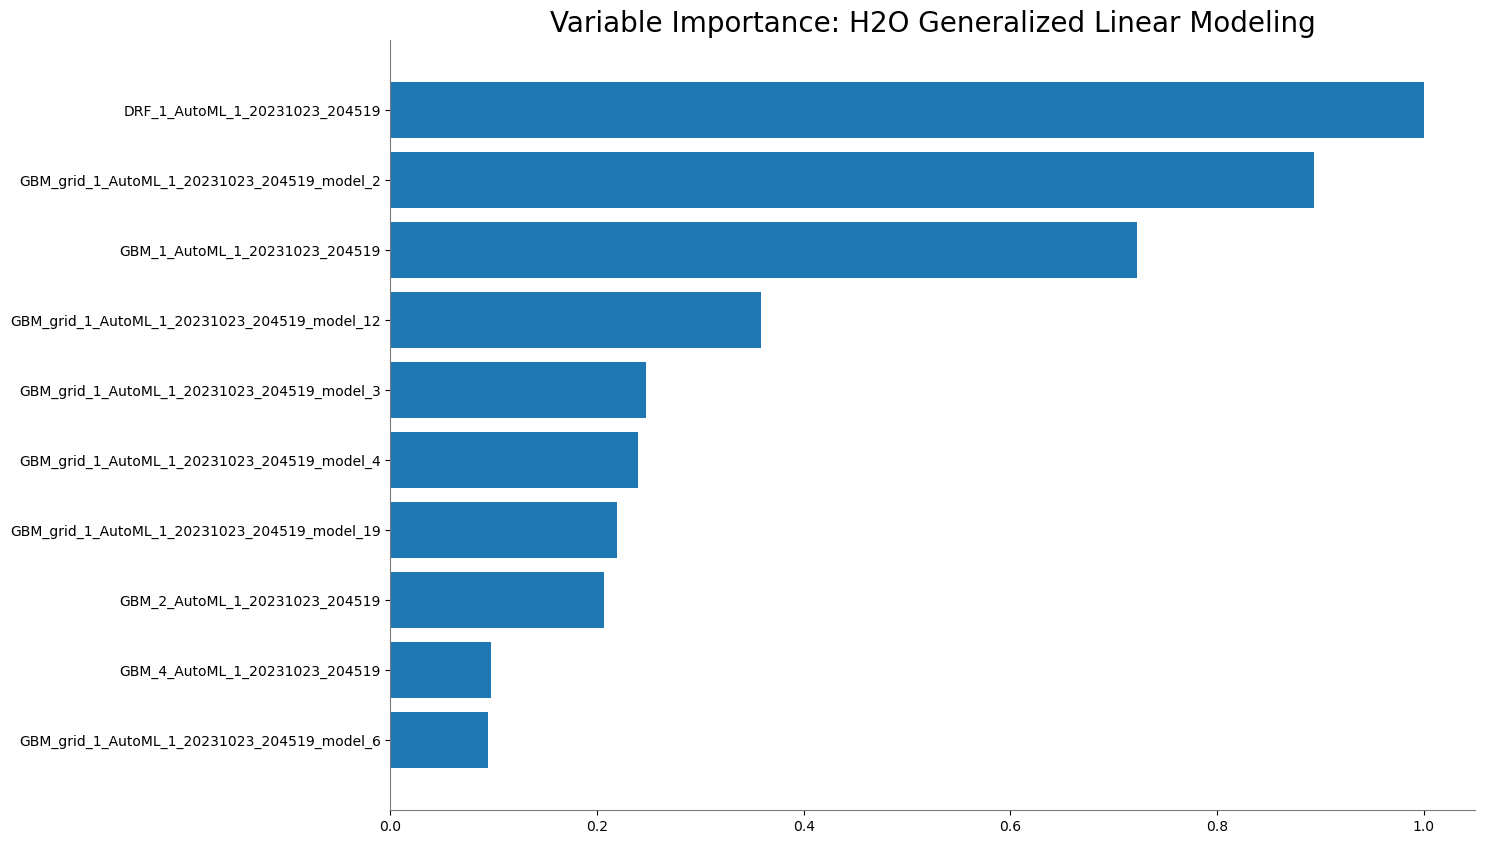

<Figure size 640x480 with 0 Axes>

In [33]:
metalearner.varimp_plot()

## Let's explore our base learner : DRF_1_AutoML_1_20231023_204519

In [22]:
base_model = h2o.get_model('DRF_1_AutoML_1_20231023_204519')

In [24]:
base_model.model_performance(test)

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.08329740377305862
RMSE: 0.2886128960615908
LogLoss: 0.27082752758833895
Mean Per-Class Error: 0.16418543436759397
AUC: 0.9281792056287168
AUCPR: 0.5942672598587927
Gini: 0.8563584112574336

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.07948190323720873
       no    yes    Error    Rate
-----  ----  -----  -------  ----------------
no     9095  911    0.091    (911.0/10006.0)
yes    323   1038   0.2373   (323.0/1361.0)
Total  9418  1949   0.1086   (1234.0/11367.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.0794819    0.62719   283
max f2                       0.0411975    0.738371  325
max f0point5                 0.111655     0.58843   253
max accuracy                 0.155722     0.902261  220
max precision                0.98624      1         0
max recall                   2.8046e-06   1         399
max specificity              0.98624      1         0
max absolute_mcc             0.0794819    0.5785    283
max min_per_class_accuracy   0.0462579    0.862682  320
max mean_per_class_accuracy  0.0300753    0.869293  339
max tns                      0.98624      10006     0
max fns                      0.98624      1358      0
max fps                      2.8046e-06   10006     399
max tps                      2.8046e-06   1361      399
max tnr                      0.98624      1         0
max fnr                      0.98624      0.997796  0
max fpr                      2.8046e-06   1         399
max tpr                      2.8046e-06   1         399

Gains/Lift Table: Avg response rate: 11.97 %, avg score:  4.76 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010029                    0.51163            6.22733    6.22733            0.745614         0.655637     0.745614                    0.655637            0.0624541       0.0624541                  522.733   522.733            0.0595558
2        0.0200581                   0.407891           5.86102    6.04417            0.701754         0.454202     0.723684                    0.55492             0.0587803       0.121234                   486.102   504.417            0.114938
3        0.0299991                   0.348508           5.61724    5.9027             0.672566         0.380002     0.706745                    0.496956            0.0558413       0.177076                   461.724   490.27             0.167082
4        0.0400282                   0.306065           4.76208    5.61691            0.570175         0.329538     0.672527                    0.455009            0.047759        0.224835                   376.208   461.691            0.209944
5        0.0501452                   0.272014           5.22905    5.53866            0.626087         0.28849      0.663158                    0.421413            0.0529023       0.277737                   422.905   453.866            0.258548
6        0.100026                    0.158262           4.59578    5.06846            0.550265         0.210158     0.60686                     0.316064            0.229243        0.50698                    359.578   406.846            0.462307
7        0.149996                    0.0967195          3.80837    4.64868            0.455986         0.124705     0.556598                    0.252315            0.190301        0.697281                   280.837   364.868           

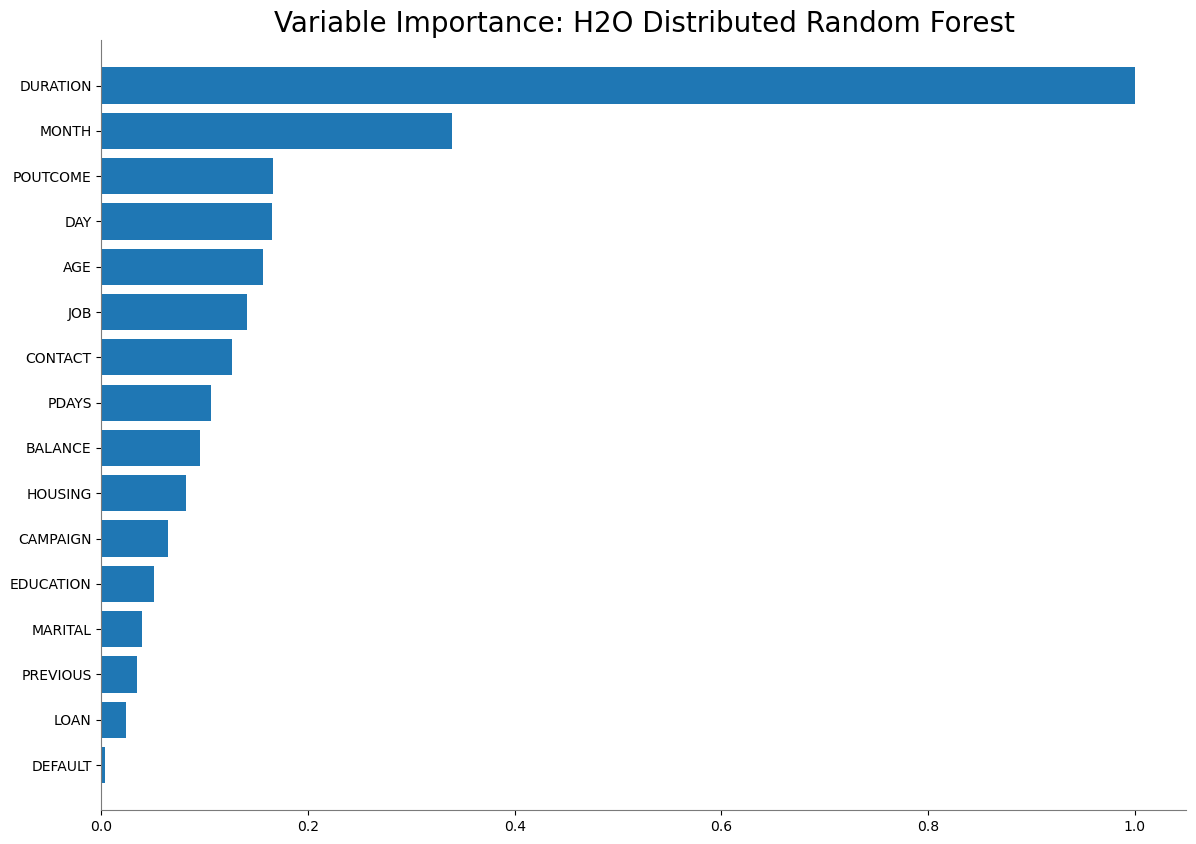

<Figure size 640x480 with 0 Axes>

In [27]:
base_model.varimp_plot(num_of_features = 20)

## Conclusion and Recommendations


#### H2O comes with great power and flexibility to trian and build machine learning models. It's helpful for data-scientists who doesn't have strong math background, by reducing the tons of time while tuning hyper-parameters and validating. One can use H2O as an alternate/great resource to build and deploy their models by harnessing it's great computational power

